In [ ]:
# !pip install mne

In [ ]:

import pandas as pd
import numpy as np

from datetime import datetime

import mne
# Following guide, no clue about the utilities really
from mne import Epochs, pick_types
from mne.preprocessing import ICA
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.channels import make_standard_montage
from mne.decoding import UnsupervisedSpatialFilter
from mne.viz import plot_topomap


##### Entering Data

In [ ]:
# https://openbci.com/forum/index.php?p=/discussion/3625/recorded-data-format-and-processing
headers = [
    "Sample Index",
    "EXG Channel 0",
    "EXG Channel 1",
    "EXG Channel 2",
    "EXG Channel 3",
    "EXG Channel 4",
    "EXG Channel 5",
    "EXG Channel 6",
    "EXG Channel 7",
    "Accel Channel 0",
    "Accel Channel 1",
    "Accel Channel 2",
    "Not Used 1",
    "Digital Channel 0",
    "Digital Channel 1",
    "Digital Channel 2",
    "Digital Channel 3",
    "Not Used 2",
    "Digital Channel 4",
    "Analog Channel 0",
    "Analog Channel 1",
    "Analog Channel 2",
    "Timestamp",
    "Marker Channel",
    "Timestamp (Formatted)"
]

In [3]:

participants = [f"Participant{i}" for i in range(1,5)]
participants

['Participant1', 'Participant2', 'Participant3', 'Participant4']

In [32]:
participant = participants[1]
# print(f'{participant}/{participant}.txt')
with open(f'./{participant}/{participant}.txt', 'r') as f:
  while f.readline()[0] == "%":
    pass
  Cyton_DF = pd.read_csv(f, sep=",", names=headers)

Psycho_DF = pd.read_csv(f'./{participant}/{participant}.csv')

In [33]:
print(Cyton_DF.shape)
print(Psycho_DF.shape)

(719258, 25)
(326, 89)


In [34]:
Cyton_DF.head()

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Digital Channel 2,Digital Channel 3,Not Used 2,Digital Channel 4,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Marker Channel,Timestamp (Formatted)
0,0.0,-13965.101715,-30945.006722,-12258.747191,-32454.800004,-14237.971811,-8727.059809,-20115.139498,-30242.759614,0.02,...,1.0,80.0,15.0,80.0,0.0,0.0,0.0,1.741218e+09,0.0,2025-03-05 15:38:10.784
1,1.0,-13962.553616,-30942.458623,-12252.153427,-32447.870964,-14232.517985,-8722.097721,-20096.296978,-30232.880143,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.741218e+09,0.0,2025-03-05 15:38:10.784
2,2.0,-13966.666337,-30946.593695,-12250.119418,-32447.669798,-14230.662791,-8725.159910,-20088.071536,-30228.052166,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.741218e+09,0.0,2025-03-05 15:38:10.784
3,3.0,-13968.096848,-30943.978541,-12253.360421,-32453.525955,-14230.238107,-8724.377599,-20079.622576,-30228.320387,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.741218e+09,0.0,2025-03-05 15:38:10.784
4,4.0,-13963.604148,-30936.870687,-12249.784142,-32453.391844,-14227.466491,-8721.807149,-20081.410716,-30230.287341,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.741218e+09,0.0,2025-03-05 15:38:10.784


In [35]:
Psycho_DF.head()

,thisN,thisTrialN,thisRepN,stim_vids,start_index,end_index,repetitions,stim_faces,culprit,key_resp.keys,...,new_clip.key_resp_2.rt,new_clip.key_resp_2.duration,participant,session,date,expName,psychopyVersion,frameRate,expStart,Unnamed: 88
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diego,1,2025-03-05_15h41.47.794,MyProcedure,2024.2.4,60.029811,2025-03-05 15h42.01.370585 -0800,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diego,1,2025-03-05_15h41.47.794,MyProcedure,2024.2.4,60.029811,2025-03-05 15h42.01.370585 -0800,NaN
2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diego,1,2025-03-05_15h41.47.794,MyProcedure,2024.2.4,60.029811,2025-03-05 15h42.01.370585 -0800,NaN
3,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diego,1,2025-03-05_15h41.47.794,MyProcedure,2024.2.4,60.029811,2025-03-05 15h42.01.370585 -0800,NaN
4,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diego,1,2025-03-05_15h41.47.794,MyProcedure,2024.2.4,60.029811,2025-03-05 15h42.01.370585 -0800,NaN


In [36]:

psychoStart = Psycho_DF["expStart"][0]
psychoStart

'2025-03-05 15h42.01.370585 -0800'

In [37]:
# Convert to a proper format (replace "h" with ":" for parsing)
psychoStart = psychoStart.replace("h", ":")
dt = datetime.strptime(psychoStart, "%Y-%m-%d %H:%M.%S.%f %z")

# Convert to Unix timestamp (seconds)
psycho_unix = dt.timestamp()
print(psycho_unix)

1741218121.370585


In [38]:
cytonStart = Cyton_DF["Timestamp"][0]
print(cytonStart)
cytonEnd = Cyton_DF["Timestamp"][len(Cyton_DF)-1]
print(cytonEnd)
print(f"The experiment took {(cytonEnd-cytonStart)/60} minutes")

1741217890.7840793
1741220760.037505
The experiment took 47.82089042663574 minutes


In [39]:
psycho_dt = datetime.utcfromtimestamp(psycho_unix)
psycho_dt

datetime.datetime(2025, 3, 5, 23, 42, 1, 370585)

In [45]:
# Store as a tuple, time + marker
clenches = []
faces = []


clench_marker_name = ["polygon", "aligning_image"]
clench_marker_name = clench_marker_name[1]
for index, marker in Psycho_DF.iterrows():
  if pd.notna(marker[f"{clench_marker_name}.started"]):
    clenches.append(marker[f"{clench_marker_name}.started"])
  if pd.notna(marker["mugshots.started"]):
    culprit = marker["culprit"]
    key = marker["key_resp.keys"]
    if pd.isna(key): # if no key entered
      continue

    if (culprit == True and key == "f") or (culprit == False and key == "j"):
      correct = True
    else:
      correct = False

    faces.append((marker["mugshots.started"], culprit, correct))

print(clenches)
print(faces) # Time presented / Culprit TF / Correct Identification TF

print([trial for trial in faces if not trial[2]]) # woah no mistakes! he was perfect

[62.56531969993375, 62.56577280000784, 62.56614069989882]
[(156.8025070999283, False, True), (163.30254429997876, False, True), (169.80223179992754, True, True), (182.8020647999365, False, True), (196.8020217999583, True, True), (203.3025483000092, False, True), (209.8020101999864, False, True), (216.30211149994284, False, True), (264.51873189990874, False, True), (271.0187030999223, False, True), (277.5186414999189, True, True), (284.01857750001363, False, True), (290.5189400999807, False, True), (311.01865380001254, False, True), (317.5186316999607, False, True), (324.0185248999624, True, True), (330.5185254999669, False, True), (351.0185938999057, False, True), (364.0188255999237, True, True), (384.5183275999734, False, True), (391.0186310999561, False, True), (404.01862449990585, False, True), (410.5184215999907, True, True), (424.5184412999079, True, True), (431.0187336999225, False, True), (444.0184391000075, False, True), (464.5182432999136, False, True), (471.0184284999268, Fal

In [46]:
def PsychoTimeStampToUnix(elapsed, original=psycho_unix):
  ### elapsed should be in seconds
  ### original is the unix time stamp for when the psychopy started
  # original_dt = datetime.utcfromtimestamp(psycho_unix)
  # new_dt = dt + timedelta(seconds=11.35889619999989)
  return original + elapsed # I think this should work?


In [47]:
# Do we want to off set the second? I think we do but do we?
clench_stamp = [PsychoTimeStampToUnix(entry)-1 for entry in clenches]
face_stamp = [(PsychoTimeStampToUnix(entry[0])-1 , entry[1], entry[2]) for entry in faces]
print(clench_stamp)
print(face_stamp)
print(face_stamp[10])

[1741218182.9359047, 1741218182.9363577, 1741218182.9367256]
[(1741218277.1730921, False, True), (1741218283.6731293, False, True), (1741218290.1728168, True, True), (1741218303.1726499, False, True), (1741218317.1726067, True, True), (1741218323.6731334, False, True), (1741218330.1725953, False, True), (1741218336.6726964, False, True), (1741218384.8893168, False, True), (1741218391.389288, False, True), (1741218397.8892264, True, True), (1741218404.3891625, False, True), (1741218410.8895252, False, True), (1741218431.3892388, False, True), (1741218437.8892167, False, True), (1741218444.3891098, True, True), (1741218450.8891106, False, True), (1741218471.3891788, False, True), (1741218484.3894105, True, True), (1741218504.8889127, False, True), (1741218511.389216, False, True), (1741218524.3892095, False, True), (1741218530.8890066, True, True), (1741218544.8890262, True, True), (1741218551.3893187, False, True), (1741218564.389024, False, True), (1741218584.8888283, False, True), (17

In [48]:
clench_stamp = np.array(clench_stamp)
face_stamp = np.array([stamp[0] for stamp in face_stamp])
# print(clench_stamp)
# print(face_stamp)
print(face_stamp[10])

1741218397.8892264


In [49]:

recording_cols = [col for col in headers if col[:3] == "EXG"]

clench_epochs = []
face_epochs = []

window_size = int(250 * (1+3.5)) # the number of samples we want, 250 a second times 4.5 second window


# skip = False # to not get two samples in a row
for index, sample in Cyton_DF.iterrows():
  # if skip:
  #   skip = False
  #   continue


  if np.any(np.abs(clench_stamp - sample["Timestamp"]) <= 1/500): # Half a sample, gets the one "closest"
      start_idx = max(0, index - window_size)
      end_idx = min(len(Cyton_DF), index + window_size + 1)
      epoch = Cyton_DF.iloc[start_idx:end_idx][recording_cols]
      clench_epochs.append(epoch)
      # skip = True
      print(sample["Timestamp"])

  # if (np.abs(1740615528.278992 - sample["Timestamp"]) <= 1/500):
  #   print("This should be running :()")

  if np.any(np.abs(face_stamp - sample["Timestamp"]) <= 1/500): # Half a sample, gets the one "closest"
      start_idx = max(0, index - window_size)
      end_idx = min(len(Cyton_DF), index + window_size + 1)
      epoch = Cyton_DF.iloc[start_idx:end_idx][recording_cols]
      face_epochs.append(epoch)
      # skip = True
      # print(sample["Timestamp"])


In [51]:

print(Cyton_DF["Timestamp"][1])
print(Cyton_DF["Timestamp"][len(Cyton_DF)//2])
print(Cyton_DF["Timestamp"][len(Cyton_DF)-1])


1741217890.7841055
1741219325.6631472
1741220760.037505


In [52]:
print(clench_stamp.shape)
print(face_stamp.shape)

(3,)
(247,)


In [53]:
# Right now: 3 trials x 2251 samples x 8 electrodes
clench_np = np.array(clench_epochs)
print(clench_np.shape)
face_np = np.array(face_epochs)
print(face_np.shape)

(0,)
(439, 2251, 8)


In [55]:
# After reshape: 3 trials x 8 electrodes x 2251 samples
# clench_transposed = np.transpose(clench_np, (0, 2, 1))
# print(clench_transposed.shape)
face_transposed = np.transpose(face_np, (0, 2, 1))
print(face_transposed.shape)

(439, 8, 2251)


###### MNE Library

['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7']
(719258, 8)
(8, 719258)
Creating RawArray with float64 data, n_channels=8, n_times=719258
    Range : 0 ... 719257 =      0.000 ...  2877.028 secs
Ready.
719258
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_10568/2460191721.py:20: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.compute_psd(fmin=0, fmax=50).plot()
/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


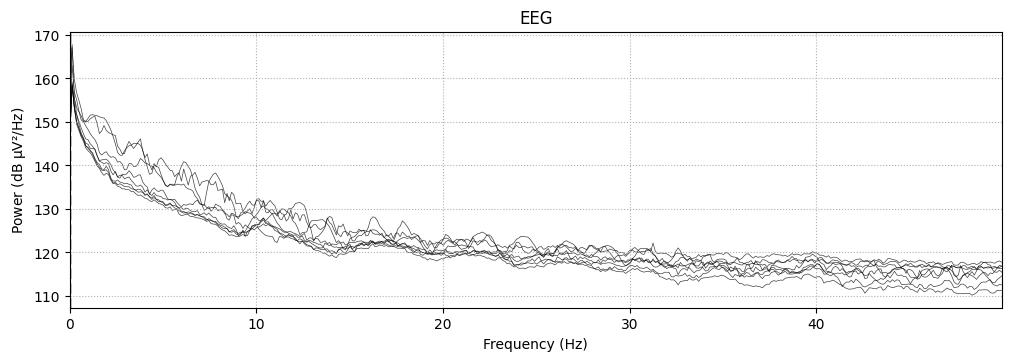

In [56]:
recording_cols = [col for col in headers if col[:3] == "EXG"] # These are the recording channel names
print(recording_cols)

New_Cyton_DF = Cyton_DF[recording_cols].copy()

ch_names = ['CH 1', 'CH 2', 'CH 3', 'CH 4', 'CH 5', 'CH 6', 'CH 7', 'CH 8']
New_Cyton_DF.columns = ch_names
ch_types = ['eeg'] * len(ch_names)
sfreq = 250
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types=ch_types)


print(New_Cyton_DF.shape)
data = New_Cyton_DF.to_numpy().T
print(data.shape)

raw = mne.io.RawArray(data, info)
print(len(raw))

fig = raw.compute_psd(fmin=0, fmax=50).plot()
fig


In [57]:
eegbci.standardize(raw)

In [58]:

"""
SRB: White | Forehead
1: Grey | Fp2
2: Purple | F4
3: Blue | F3 
4: Green | T3
5: Yellow | Cz
6: Orange | T4
7: Red | O2
8: Brown | O1
Bias: Black | Mastoid
"""



# To get this to work we would have to rename, ala
raw.rename_channels({
    "CH 1": "Fp2", "CH 2": "F4", "CH 3": "F3", "CH 4": "T3",
    "CH 5": "Cz", "CH 6": "T4", "CH 7": "O2", "CH 8": "O1"
})


montage = make_standard_montage("standard_1005")
raw.set_montage(montage)

<RawArray | 8 x 719258 (2877.0 s), ~43.9 MiB, data loaded>

In [59]:
raw.set_eeg_reference(projection=True)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawArray | 8 x 719258 (2877.0 s), ~43.9 MiB, data loaded>

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


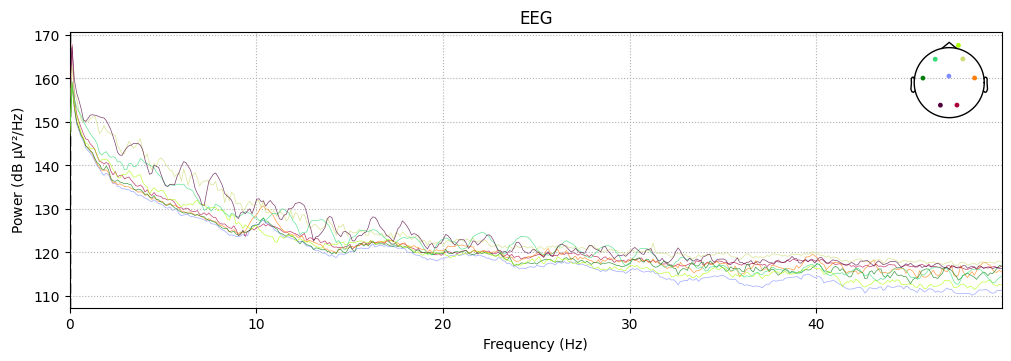

In [60]:
fig = raw.compute_psd(fmin=0, fmax=50).plot()
fig

In [61]:
f_low = 4
f_high = 30
raw.filter(f_low, f_high, fir_design="firwin", skip_by_annotation="edge")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



<RawArray | 8 x 719258 (2877.0 s), ~43.9 MiB, data loaded>

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


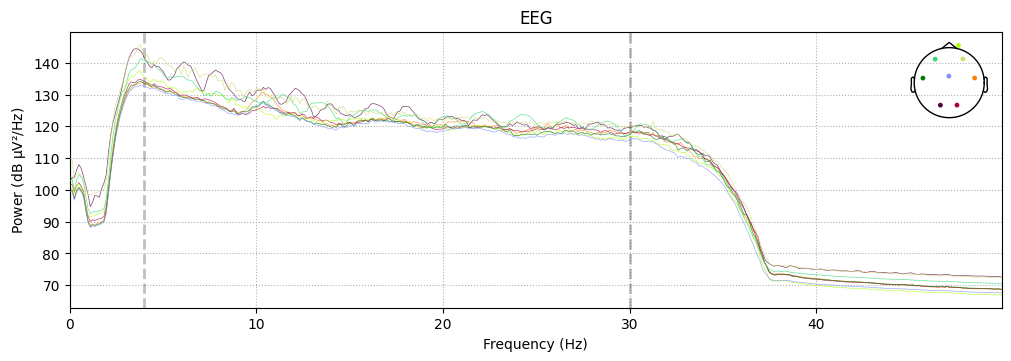

In [62]:
fig = raw.compute_psd(fmin=0, fmax=50).plot()
fig

In [31]:
picks = pick_types(raw.info, exclude="bads")
picks

array([], dtype=int64)